In [4]:
#imports here !!

import pandas as pd
import numpy as np
import random
import datetime
from sklearn.model_selection import train_test_split
##### NOTE : I used sklearn just for train_test_split to randomly shuffle data
import matplotlib.pyplot as plt

### Problem 4.1 : Theoritcal soln

### Dataset creation
#### I created a testing data where the day no. > 20 . The day no , is extracted from data time feature

In [16]:
###### Dataset creation..


True_data = pd.read_csv('hour.csv' )
True_data['dteday'] = True_data['dteday'].astype('datetime64[ns]')
True_data['day'] = (True_data.dteday.dt.day)

True_data['bias'] = 0*True_data['day']  + 1  ##### having a bias term 
######## normalisation.

normalised_df = True_data.copy()
normalised_df.head()
normalised_df.iloc[:,2:14] = True_data.iloc[:,2:14].apply(lambda x: np.round((x-x.mean())/ x.std(),decimals = 2), axis=0)
Data = normalised_df.copy()



######### dividing the data into training and testing depending on date
Train_data = Data[ Data['day'] < 20 ]
Test_data = Data[ Data['day'] > 19 ]
'''
print('Training_data')
display(Train_data)

print('\n Testing Data')
display(Test_data)
'''

display(True_data)

features = ['bias','season','mnth','hr','workingday','weathersit','windspeed','temp']


X_train_data = pd.DataFrame(Train_data,columns = features)
display(X_train_data)
Y_train_data = pd.DataFrame(Train_data,columns = ['cnt'])

X_test_data = pd.DataFrame(Test_data,columns = features)
display(X_test_data)
Y_test_data = pd.DataFrame(Test_data,columns = ['cnt'])


######## divinding training data to Training and Validation set . ration 80:20
X_train_df, X_validation_df, Y_train_df, Y_validation_df = train_test_split(X_train_data,Y_train_data, test_size=0.2, random_state=42)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,bias
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31,1
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31,1
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31,1
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,31,1


,bias,season,mnth,hr,workingday,weathersit,windspeed,temp
0,1,-1.36,-1.61,-1.67,-1.47,-0.67,-1.55,-1.33
1,1,-1.36,-1.61,-1.53,-1.47,-0.67,-1.55,-1.44
2,1,-1.36,-1.61,-1.38,-1.47,-0.67,-1.55,-1.44
3,1,-1.36,-1.61,-1.24,-1.47,-0.67,-1.55,-1.33
4,1,-1.36,-1.61,-1.09,-1.47,-0.67,-1.55,-1.33
...,...,...,...,...,...,...,...,...
17088,1,1.35,1.59,1.08,0.68,-0.67,1.62,-0.61
17089,1,1.35,1.59,1.22,0.68,-0.67,0.28,-0.71
17090,1,1.35,1.59,1.37,0.68,-0.67,0.28,-0.82
17091,1,1.35,1.59,1.51,0.68,-0.67,-0.82,-0.82


,bias,season,mnth,hr,workingday,weathersit,windspeed,temp
431,1,-1.36,-1.61,-1.67,0.68,-0.67,1.62,-1.23
432,1,-1.36,-1.61,-1.53,0.68,-0.67,-1.55,-1.23
433,1,-1.36,-1.61,-1.38,0.68,-0.67,-1.55,-1.23
434,1,-1.36,-1.61,-1.24,0.68,-0.67,-0.21,-1.23
435,1,-1.36,-1.61,-1.09,0.68,-0.67,-0.21,-1.23
...,...,...,...,...,...,...,...,...
17374,1,-1.36,1.59,1.08,0.68,0.90,-0.21,-1.23
17375,1,-1.36,1.59,1.22,0.68,0.90,-0.21,-1.23
17376,1,-1.36,1.59,1.37,0.68,-0.67,-0.21,-1.23
17377,1,-1.36,1.59,1.51,0.68,-0.67,-0.46,-1.23


In [17]:
########### Converting into array for easy manipulations

X_train = X_train_df.to_numpy()
Y_train = Y_train_df.to_numpy()

X_validation = X_validation_df.to_numpy()
Y_validation = Y_validation_df.to_numpy()

X_test = X_test_data.to_numpy()
Y_test = Y_test_data.to_numpy()


print(X_train[0:5])

[[ 1.    0.45  0.13 -0.95  0.68 -0.67 -0.82  0.95]
 [ 1.    0.45  0.43  0.64 -1.47 -0.67  0.89  2.09]
 [ 1.    0.45  0.13  0.5   0.68 -0.67  0.52  1.57]
 [ 1.   -0.45 -0.74 -1.09 -1.47  0.9  -0.7  -0.71]
 [ 1.    1.35  1.3  -0.22 -1.47 -0.67  0.52 -0.92]]


### Question 4.2
#### Observing statistics of counts 

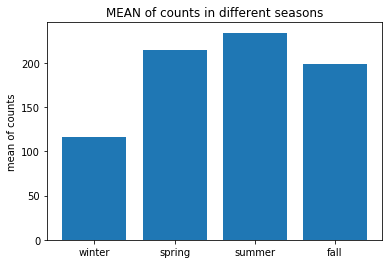

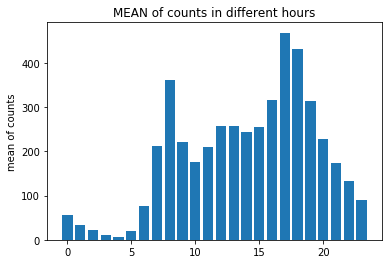

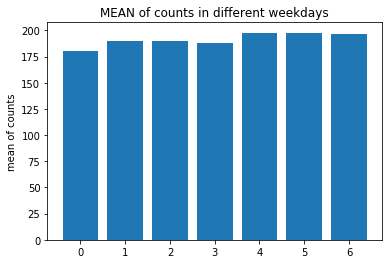

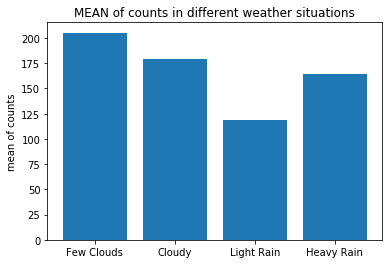

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [77]:
### mean of counts over seasons:

mean_sn_df = Train_data[["season","cnt"]].groupby("season").mean()
mean_sn = mean_sn_df.to_numpy()
y = np.reshape(mean_sn,(4,))
season = ['winter', 'spring', 'summer', 'fall' ]
plt.bar(season,y)
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different seasons')
plt.show()
plt.figure()



### mean of counts over hours:
mean_hr_df = Train_data[["hr","cnt"]].groupby("hr").mean()
mean_hr = mean_hr_df.to_numpy()
y = np.reshape(mean_hr,(24,))
hr = np.arange(0,24)
plt.bar(hr,y)
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different hours')
plt.show()
plt.figure()


### mean of counts over weekdays:
mean_wd_df = Train_data[["weekday","cnt"]].groupby("weekday").mean()
mean_wd = mean_wd_df.to_numpy()
y = np.reshape(mean_wd,(7,))
wd = np.arange(0,7)
plt.bar(wd,y)
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different weekdays')
plt.show()
plt.figure()


### mean of counts over difference weathersit
mean_ws_df = Train_data[["weathersit","cnt"]].groupby("weathersit").mean()
mean_ws = mean_ws_df.to_numpy()
y = np.reshape(mean_ws,(4,))
ws = ['Few Clouds','Cloudy','Light Rain','Heavy Rain']
plt.bar(ws,y)
plt.ylabel('mean of counts')
plt.title('MEAN of counts in different weather situations')
plt.show()
plt.figure()

### Plotting count vs features : 

<Figure size 432x288 with 0 Axes>

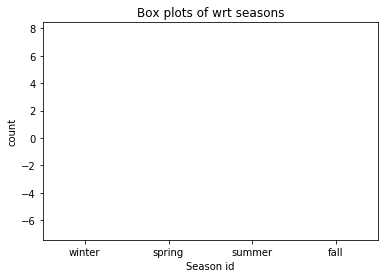

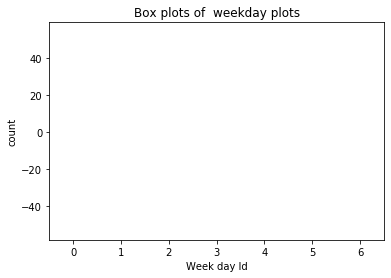

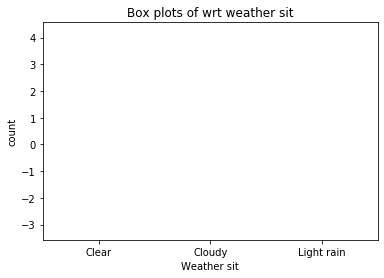

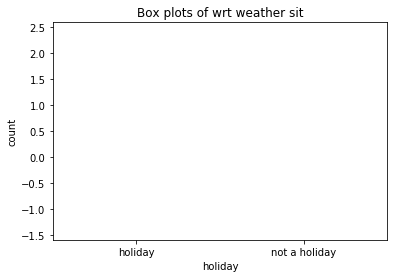

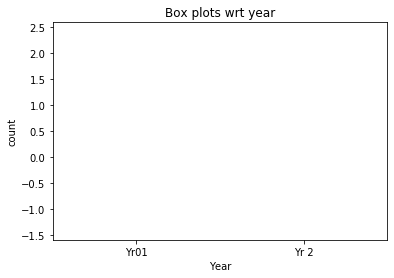

<Figure size 432x288 with 0 Axes>

In [17]:
### feature 1 : season

s1 = Train_data[ Train_data['season'] ==1 ]['cnt']
s2 = Train_data[ Train_data['season'] ==2 ]['cnt']
s3 = Train_data[ Train_data['season'] ==3 ]['cnt']
s4 = Train_data[ Train_data['season'] ==4 ]['cnt']


data = [s1,s2,s3,s4]
plt.xlabel('Season id')
plt.ylabel('count')
plt.title('Box plots of wrt seasons')
plt.boxplot(data,labels = ['winter','spring','summer','fall'])
plt.figure()

#Feature 2 : weekday
s0 = Train_data[ Train_data['weekday'] ==0 ]['cnt']
s1 = Train_data[ Train_data['weekday'] ==1 ]['cnt']
s2 = Train_data[ Train_data['weekday'] ==2 ]['cnt']
s3 = Train_data[ Train_data['weekday'] ==3 ]['cnt']
s4 = Train_data[ Train_data['weekday'] ==4 ]['cnt']
s5 = Train_data[ Train_data['weekday'] ==5 ]['cnt']
s6 = Train_data[ Train_data['weekday'] ==6 ]['cnt']

data = [s0,s1,s2,s3,s4,s5,s6]
plt.xlabel('Week day Id')
plt.ylabel('count')
plt.title('Box plots of  weekday plots')
plt.boxplot(data,labels = ['0','1','2','3','4','5','6'])
plt.figure()

## Feature : 03 : weather_sit

s1 = Train_data[ Train_data['weathersit'] ==1 ]['cnt']
s2 = Train_data[ Train_data['weathersit'] ==2 ]['cnt']
s3 = Train_data[ Train_data['weathersit'] ==3 ]['cnt']

data = [s1,s2,s3]
plt.xlabel('Weather sit')
plt.ylabel('count')
plt.title('Box plots of wrt weather sit')
plt.boxplot(data, labels = ['Clear','Cloudy','Light rain'])
plt.figure()

## Feature : 04 : hday

s1 = Train_data[ Train_data['holiday'] ==0 ]['cnt']
s2 = Train_data[ Train_data['holiday'] ==1 ]['cnt']


data = [s1,s2]
plt.xlabel('holiday')
plt.ylabel('count')
plt.title('Box plots of wrt weather sit')
plt.boxplot(data,labels = ['holiday','not a holiday'])
plt.figure()


#### Feature 05 : temp

s1 = Train_data[ Train_data['yr'] ==0 ]['cnt']
s2 = Train_data[ Train_data['yr'] ==1 ]['cnt']


data = [s1,s2]
plt.xlabel('Year')
plt.ylabel('count')
plt.title('Box plots wrt year')
plt.boxplot(data,labels = ['Yr01','Yr 2'])
plt.figure()


### Problem 4.3

In [14]:
#############
### gradient_descent takes in the past beta-param, X, Y and thus calculates 
### the gradient of the loss function.

### The proof for it is given in the handwriiten report


def gradient_descent(beta,X,Y,lr,lamda =0,reg_type = 0):
    
    beta_new = beta.copy()
    N,_ = Y.shape 
    Y_hat = np.exp(X @ beta)
    diff = (Y_hat - Y)
    
    if(reg_type == 0):
        beta_new = beta - (lr/(N))*( np.transpose(X)@diff ) 
        
    elif(reg_type==1):
        i = np.ones((beta.shape))
        beta_new = ( beta + (lamda/N)*i )  - (lr/(N))*(np.transpose(X)@diff)
        
    elif(reg_type == 2):
        beta_new = (1+ (lamda/N) )*beta - (lr/(N))*( np.transpose(X)@diff ) 
        
    
    return beta_new


#### Calculating rmse--> root mean square error, with Y_hat--> Y_pred
def rmse(Y,Y_hat):
    diff = Y - Y_hat
    error = np.sqrt(np.mean(np.square((diff)) ))
    return error

### Once beta converges , we can calculte Y_pred with this function

def predict(X,beta):
    return np.exp(X @ beta)

###  Computing log-loss which is calculated on the validation data set
def compute_log_loss(X_validate,Y_validate,Y_pred,beta,lamda = 0,reg_type = 0):
    N = beta.size
    n,_ = X_validate.shape
    if (reg_type == 0):
        loss =  (1/n)*np.sum( Y_pred - np.multiply(Y_validate, X_validate@beta) )
    elif(reg_type == 1):
        loss =  (1/n)*np.sum( Y_pred - np.multiply(Y_validate, X_validate@beta) ) + (lamda/N)*(np.sum(beta)) 
    else:
        loss = (1/n)*np.sum( Y_pred - np.multiply(Y_validate, X_validate@beta) ) + (lamda/(2*N) )*(np.sum(beta**2))

    return loss

#### Using all the above funvtions and run gradient descent for 'n' epochs
def run_epochs(X_train,Y_train,X_validate,Y_validate, lr,epochs,reg_type = 0,lamda = 0):
    _,k = X_train.shape
    B = np.random.randn(k,1)+0.1
    
    for j in range(epochs):
        beta = B.copy()
        #print(beta)
        B = gradient_descent(beta,X_train,Y_train,lr,lamda,reg_type)
        
        Y_pred = predict(X_validate,B)
        loss = compute_log_loss(X_validate,Y_validate,Y_pred,B,lamda,reg_type)
        if(j%20 == 0):
            print('Validation loss for epoch %d  : %.2f'%(j,loss) )
        
    return B

In [18]:

param = run_epochs(X_train,Y_train,X_validation,Y_validation,5e-3,100,reg_type = 1,lamda = 0.1)


Y_test_pred = predict(X_test,param)

print(rmse(Y_test,Y_test_pred))

print(param)

Validation loss for epoch 0  : -416.72
Validation loss for epoch 20  : -842.06
Validation loss for epoch 40  : -842.33
Validation loss for epoch 60  : -842.42
Validation loss for epoch 80  : -842.45
159.66090507160268
[[ 5.1104754 ]
 [-0.09365577]
 [ 0.22818217]
 [ 0.35173569]
 [ 0.00654085]
 [-0.10454275]
 [ 0.07785008]
 [ 0.30703021]]


In [114]:
print(X_test[0])
a = np.exp(X_test @ Weights)
print(a)
print(rmse(Y_test,a))

[ 1.         -1.35659527 -1.61039159 -1.66995594  0.68169014 -0.66517371
  1.61845695 -1.23074336]
[[ 61.11613169]
 [ 50.2725323 ]
 [ 52.89743506]
 ...
 [293.40159281]
 [302.92024504]
 [318.73675858]]
158.4158644852009
